In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
claims = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/heritage health prize/heritage dataset/release3/Claims.csv')
members = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/heritage health prize/heritage dataset/release3/Members.csv')
drug_count = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/heritage health prize/heritage dataset/release3/DrugCount.csv')
lab_count = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/heritage health prize/heritage dataset/release3/LabCount.csv')

dih_y2 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/heritage health prize/heritage dataset/release3/DaysInHospital_Y2.csv')
dih_y3 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/heritage health prize/heritage dataset/release3/DaysInHospital_Y3.csv')
# target_df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/heritage health prize/heritage dataset/release3/Target.csv')

# Custom Functions

In [ ]:
# convert text values to integer values
# pay delay
def pay_delay_to_int(text_val):
  if text_val=='162+':
    return 162
  else:
    return int(text_val)

# days since first claim
def dsfs_to_int(text_val):
  if text_val=='0- 1 month':
    return 1
  elif text_val=='1- 2 months':
    return 2
  elif text_val=='2- 3 months':
    return 3
  elif text_val=='3- 4 months':
    return 4
  elif text_val=='4- 5 months':
    return 5
  elif text_val=='5- 6 months':
    return 6
  elif text_val=='6- 7 months':
    return 7
  elif text_val=='7- 8 months':
    return 8
  elif text_val=='8- 9 months':
    return 9
  elif text_val=='9-10 months':
    return 10
  elif text_val=='10-11 months':
    return 11
  elif text_val=='11-12 months':
    return 12

# charson index
def charlson_ind_to_int(text_val):
  if text_val=='0':
    return 0
  elif text_val=='1-2':
    return 2
  elif text_val=='3-4':
    return 4
  elif text_val=='5+':
    return 6

# length of stay
def los_to_int(text_val):
  if text_val=='1 day':
    return 1
  elif text_val=='2 days':
    return 2
  elif text_val=='3 days':
    return 3
  elif text_val=='4 days':
    return 4
  elif text_val=='5 days':
    return 5
  elif text_val=='6 days':
    return 6
  elif text_val=='1- 2 weeks':
    return 11
  elif text_val=='2- 4 weeks':
    return 21
  elif text_val=='4- 8 weeks':
    return 42
  elif text_val=='26+ weeks':
    return 180

# drug count
def drug_count_to_int(text_val):
  if text_val=='7+':
    return 7
  else:
    return int(text_val)

# lab count
def lab_count_to_int(text_val):
  if text_val=='10+':
    return 10
  else:
    return int(text_val)

# Which age groups spend the most days in hospital?

In [ ]:
claims.loc[:, 'PayDelay'] = claims['PayDelay'].apply(pay_delay_to_int)
claims.loc[:, 'DSFS'] = claims['DSFS'].apply(dsfs_to_int)
claims.loc[:, 'CharlsonIndex'] = claims['CharlsonIndex'].apply(charlson_ind_to_int)
claims.loc[:, 'LengthOfStay'] = claims['LengthOfStay'].apply(los_to_int)

drug_count.loc[:, 'DrugCount'] = drug_count['DrugCount'].apply(drug_count_to_int)
lab_count.loc[:, 'LabCount'] = lab_count['LabCount'].apply(lab_count_to_int)

In [ ]:
df1 = dih_y2.merge(members, how='left', on='MemberID')

df1.head()

,MemberID,ClaimsTruncated,DaysInHospital,AgeAtFirstClaim,Sex
0,24027423,0,0,30-39,M
1,98324177,0,0,30-39,M
2,33899367,1,1,80+,F
3,5481382,0,1,20-29,F
4,69908334,0,0,60-69,F


In [ ]:
# function to get percentage contribution of each age group
def pct(series):
  return series.count() / len(df1)

group_age_summary = df1.groupby('AgeAtFirstClaim', as_index=False, dropna=False)['DaysInHospital'].agg(['count', pct, 'min', 'max', 'mean', 'std', 'sum']).reset_index()
group_age_summary

,AgeAtFirstClaim,count,pct,min,max,mean,std,sum
0,0-9,6529,0.085865,0,15,0.171083,0.688213,1117
1,10-19,6906,0.090823,0,15,0.148277,0.670487,1024
2,20-29,4517,0.059405,0,15,0.427275,1.319050,1930
3,30-39,7308,0.096110,0,15,0.311166,1.130369,2274
4,40-49,10108,0.132934,0,15,0.208548,0.936406,2108
5,50-59,8544,0.112365,0,15,0.296348,1.328764,2532
6,60-69,8832,0.116152,0,15,0.492074,1.765478,4346
7,70-79,12252,0.161130,0,15,0.732125,2.157515,8970
8,80+,6500,0.085484,0,15,1.029231,2.394165,6690
9,NaN,4542,0.059733,0,15,0.996477,2.196870,4526


In [ ]:
print(f'Smallest % age group: {100 * group_age_summary.pct.min():.2f}% {group_age_summary[group_age_summary.pct==group_age_summary.pct.min()].AgeAtFirstClaim.values[0]}')
print(f'Largest % age group: {100 * group_age_summary.pct.max():.2f}% {group_age_summary[group_age_summary.pct==group_age_summary.pct.max()].AgeAtFirstClaim.values[0]}')

Smallest % age group: 5.94% 20-29
Largest % age group: 16.11% 70-79


We can see that members are distributed across different age groups quite evenly, ranging from 5.94% (20-29 group) to 16.11% (70-79 group).

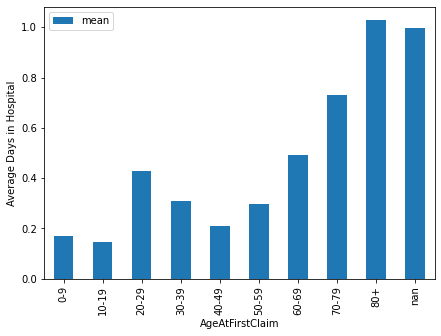

In [ ]:
group_age_summary.plot(x='AgeAtFirstClaim', y='mean', kind='bar', figsize=(7, 5), ylabel='Average Days in Hospital')

Seniors (over 65 years old) spend more days in the hospital than members from other age groups.

# Which gender spend more days in hospital?

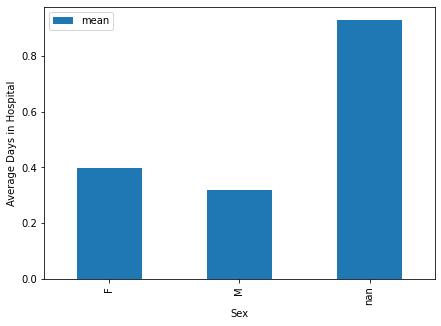

In [ ]:
gender_summary = df1.groupby('Sex', as_index=False, dropna=False)['DaysInHospital'].agg(['count', pct, 'min', 'max', 'mean', 'std', 'sum']).reset_index()

gender_summary.plot(x='Sex', y='mean', kind='bar', figsize=(7, 5), ylabel='Average Days in Hospital')

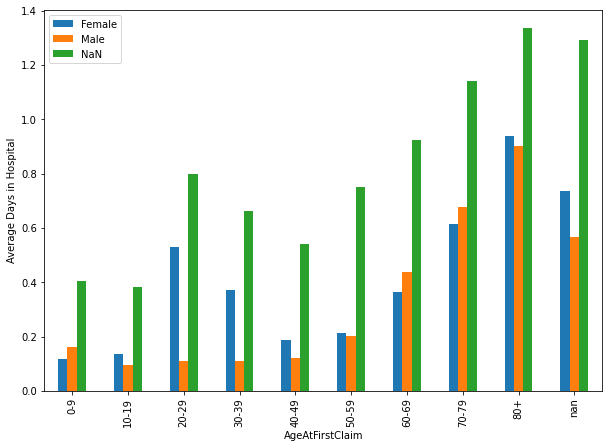

In [ ]:
f_days_in_hospital = df1[df1['Sex']=='F'].groupby('AgeAtFirstClaim', as_index=False, dropna=False)['DaysInHospital'].mean().reset_index(drop=True).rename(columns={'DaysInHospital': 'Female'})
m_days_in_hospital = df1[df1['Sex']=='M'].groupby('AgeAtFirstClaim', as_index=False, dropna=False)['DaysInHospital'].mean().reset_index(drop=True).rename(columns={'DaysInHospital': 'Male'})
nan_days_in_hospital = df1[pd.isna(df1['Sex'])==True].groupby('AgeAtFirstClaim', as_index=False, dropna=False)['DaysInHospital'].mean().reset_index(drop=True).rename(columns={'DaysInHospital': 'NaN'})

# plot days in hospital across different age groups and genders
f_days_in_hospital.merge(m_days_in_hospital, how='left', on='AgeAtFirstClaim').merge(nan_days_in_hospital, how='left', on='AgeAtFirstClaim').plot(
    x='AgeAtFirstClaim', y=['Female', 'Male', 'NaN'], kind='bar', figsize=(10, 7), ylabel='Average Days in Hospital')

On average, female patients spend more time in hospital than their male counterparts. Except for some age groups, 0-9, 60-69 and 70-79, where male patients are admitted into hospital more.

# Number of Claims

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/heritage health prize/hhp_final_data.csv")

# data.head()

In [ ]:
data_y1 = data[data['Year']=='Y1'][['MemberID', 'ClaimsTruncated', 'DaysInHospital', 'no_claims', 'avg_paydelay', 'avg_los', 'avg_charlsonindex']]

In [ ]:
# data_y1.plot(x='no_claims', y='DaysInHospital', kind='scatter', figsize=(10, 7), alpha=.7)

data_y1[['DaysInHospital',	'no_claims']].corr()

,DaysInHospital,no_claims
DaysInHospital,1.000000,0.183525
no_claims,0.183525,1.000000


Number of claims and Days in hospital have a positive correlation, but not very significant.

# Pay delay

In [ ]:
data.head()

,MemberID,ClaimsTruncated,DaysInHospital,Year,trainset,age_0-9,age_10-19,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,age_80+,age_nan,sex_F,sex_M,sex_nan,no_claims,no_providers,no_vendors,no_pcp,no_placesvc,no_specialty,no_pcg,no_pg,max_paydelay,min_paydelay,avg_paydelay,std_paydelay,max_los,min_los,avg_los,std_los,los_tot_unknown,los_tot_suppressed,los_tot_known,max_charlsonindex,min_charlsonindex,avg_charlsonindex,...,pg0,pg1,pg2,pg3,pg4,pg5,pg6,pg7,pg8,pg9,pg10,pg11,pg12,pg13,pg14,pg15,pg16,pg17,ps0,ps1,ps2,ps3,ps4,ps5,ps6,ps7,ps8,min_drugcount,max_drugcount,avg_drugcount,count_drugcount,min_labcount,max_labcount,avg_labcount,count_labcount,pcp_prob,vendor_prob,provider_prob,drugcount_nan,labcount_nan
0,24027423,0,0,Y1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,5,3,3,1,2,3,3,4,35,27,30.400000,4.219005,0.0,0.0,0.0,-1.0,5,0,0,4,0,2.8,...,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.000000,1.0,7.0,7.0,7.000000,1.0,0.257737,0.299153,0.239850,0,0
1,98324177,0,0,Y1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,6,3,3,1,2,2,2,4,146,23,70.666667,59.308234,0.0,0.0,0.0,-1.0,6,0,0,0,0,0.0,...,0.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,1.0,7.0,7.0,7.000000,1.0,0.265180,0.248000,0.242471,0,0
2,33899367,1,1,Y1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,41,8,8,1,3,6,8,6,162,13,45.000000,31.216983,0.0,0.0,0.0,-1.0,41,0,0,0,0,0.0,...,5.0,22.0,1.0,3.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,6.0,2.300000,10.0,1.0,1.0,1.000000,1.0,0.106716,0.327027,0.209908,0,0
3,5481382,0,1,Y1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,12,6,5,1,3,5,5,4,162,28,68.000000,48.151277,0.0,0.0,0.0,-1.0,12,0,0,0,0,0.0,...,0.0,5.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,1.111111,9.0,1.0,2.0,1.666667,3.0,0.213570,0.245260,0.239850,0,0
4,69908334,0,0,Y1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,17,9,6,1,3,5,5,6,77,22,48.117647,16.773798,0.0,0.0,0.0,-1.0,17,0,0,0,0,0.0,...,4.0,6.0,1.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,1.777778,9.0,8.0,8.0,8.000000,1.0,0.268316,0.245260,0.253925,0,0


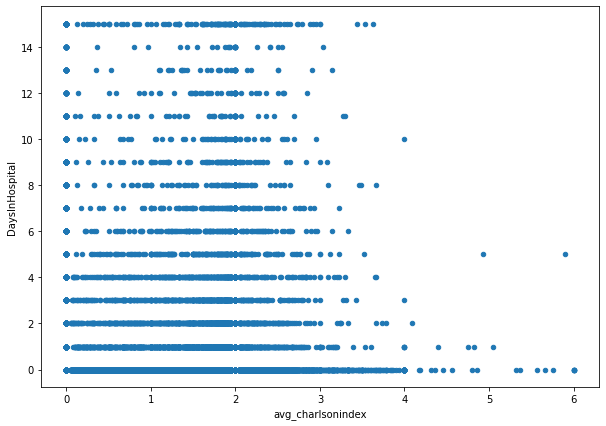

In [ ]:
variable = 'avg_charlsonindex'
data_y1[[variable, 'DaysInHospital']].plot(variable, 'DaysInHospital', kind='scatter', figsize=(10, 7))

In [ ]:
data_y1[[variable, 'DaysInHospital']].corr()

,avg_charlsonindex,DaysInHospital
avg_charlsonindex,1.000000,0.145289
DaysInHospital,0.145289,1.000000


# Some categorical variables:
- Primary Condition Group
- Specialty
- Procedure Group
- Place of Service

In [ ]:
claims_1 = claims[claims['Year']=='Y1'].copy()

In [ ]:
claims_1.head()

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,9.0,NEUMENT,0,MED,0
6,99829076,6721023.0,265273.0,91972.0,Y1,Rehabilitation,Office,162,NaN,1.0,TRAUMA,0,MED,0
7,54666321,9932074.0,35565.0,27294.0,Y1,Diagnostic Imaging,Office,29,NaN,1.0,RESPR4,0,RAD,0
11,66951188,4699470.0,179509.0,75876.0,Y1,Diagnostic Imaging,Inpatient Hospital,51,NaN,1.0,ROAMI,0,RAD,0
12,78859054,9121540.0,523791.0,21579.0,Y1,Emergency,Urgent Care,22,1.0,7.0,HEART2,0,SDS,0


In [ ]:
"""
calcualte the percentage of claims that is associated with each values in Specialty, PlaceSvc, PrimaryConditionGroup, ProcedureGroup
"""
def count_dist(col):
  return col.count() / len(claims_1)

claims_1.groupby('Specialty', as_index=False)['MemberID'].agg(['count', count_dist]).sort_values(by='count_dist', ascending=False)

,count,count_dist
Specialty,,
Laboratory,215039,0.248402
Internal,210322,0.242953
General Practice,163192,0.188511
Diagnostic Imaging,66633,0.076971
Surgery,65827,0.076040
Emergency,43131,0.049823
Other,28230,0.032610
Pediatrics,27083,0.031285
Rehabilitation,17189,0.019856


In [ ]:
claims_1.groupby('PlaceSvc', as_index=False)['MemberID'].agg(['count', count_dist]).sort_values(by='count_dist', ascending=False)

,count,count_dist
PlaceSvc,,
Office,504806,0.583126
Independent Lab,216154,0.249690
Urgent Care,65888,0.076110
Outpatient Hospital,35814,0.041371
Inpatient Hospital,26302,0.030383
Ambulance,8875,0.010252
Other,3867,0.004467
Home,1411,0.001630


In [ ]:
claims_1.groupby('PrimaryConditionGroup', as_index=False)['MemberID'].agg(['count', count_dist]).sort_values(by='count_dist', ascending=False)

,count,count_dist
PrimaryConditionGroup,,
MSC2a3,170683,0.197164
METAB3,106795,0.123364
ARTHSPIN,91544,0.105747
NEUMENT,54984,0.063515
RESPR4,46232,0.053405
MISCHRT,39653,0.045805
SKNAUT,34050,0.039333
GIBLEED,33946,0.039213
INFEC4,28126,0.032490


In [ ]:
claims_1.groupby('ProcedureGroup', as_index=False)['MemberID'].agg(['count', count_dist]).sort_values(by='count_dist', ascending=False)

,count,count_dist
ProcedureGroup,,
EM,343043,0.396266
PL,161615,0.186689
MED,118872,0.137315
SCS,90419,0.104447
RAD,85093,0.098295
SDS,19594,0.022634
SIS,17727,0.020477
SMS,9122,0.010537
ANES,5273,0.006091


For instance, the value `Home` in `Specialty` is associated with less than 1% of the total number of claims. We suspect that some of these values are not very useful if applied in our models. Later, we will try to remove some of these values that are not very important to our model.

Text(0, 0.5, 'Number of members')

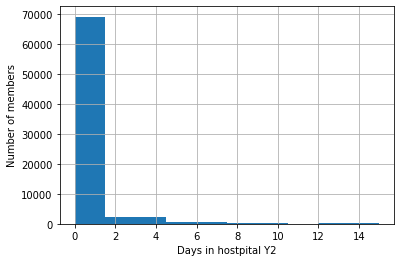

In [ ]:
dih_y2['DaysInHospital'].hist()
plt.xlabel('Days in hostpital Y2')
plt.ylabel('Number of members')

Text(0, 0.5, 'Number of members')

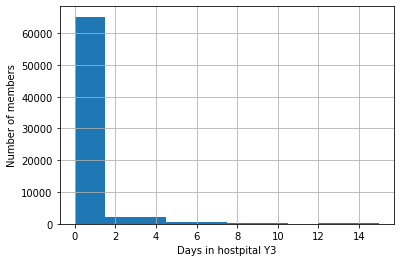

In [ ]:
dih_y3['DaysInHospital'].hist()
plt.xlabel('Days in hostpital Y3')
plt.ylabel('Number of members')

In [ ]:
target_desc = pd.concat([dih_y2['DaysInHospital'].describe(), dih_y3['DaysInHospital'].describe()], axis=1)
target_desc.columns = ['Year 2', 'Year 3']
target_desc

,Year 2,Year 3
count,76038.000000,71435.000000
mean,0.467095,0.437895
std,1.612194,1.531780
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,15.000000,15.000000


In [ ]:
dih_y3['DaysInHospital'].describe()

count    71435.000000
mean         0.437895
std          1.531780
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: DaysInHospital, dtype: float64